In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#read in sales
sales20 = pd.read_csv("2020_manhattan.csv", header=6)
sales21 = pd.read_csv("2021_manhattan.csv", header=6)
sales22 = pd.read_csv("rollingsales_manhattan.csv")
sales22.rename(columns = {' SALE PRICE ':'SALE PRICE'}, inplace = True)
sales22.rename(columns = {'RESIDENTIAL UNITS':'RESIDENTIAL\nUNITS'}, inplace = True)
sales22.rename(columns = {'COMMERCIAL UNITS':'COMMERCIAL\nUNITS'}, inplace = True)
sales22.rename(columns = {'TOTAL UNITS':'TOTAL \nUNITS'}, inplace = True)
sales22.rename(columns = {'LAND SQUARE FEET':'LAND \nSQUARE FEET'}, inplace = True)
sales22.rename(columns = {'GROSS SQUARE FEET':'GROSS \nSQUARE FEET'}, inplace = True)
sales22.rename(columns = {'BUILDING CLASS AT TIME OF SALE':'BUILDING CLASS\nAT TIME OF SALE'}, inplace = True)

In [3]:
sales20 = sales20.dropna(how='all')
sales21 = sales21.dropna(how='all')
sales22 = sales22.dropna(how='all')

In [4]:
allsales = pd.concat((sales20, sales21, sales22), axis=0)

In [5]:
allsales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE,EASEMENT,City,State,Country
1,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377.0,72.0,NaN,B9,231 EAST 7TH,NaN,...,"5,154",1901.0,1.0,B9,0,10/2/2020,NaN,NaN,NaN,NaN
2,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,66.0,NaN,C0,243 EAST 7TH STREET,NaN,...,"3,084",1899.0,1.0,C0,0,10/31/2020,NaN,NaN,NaN,NaN
3,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,66.0,NaN,C0,243 EAST 7TH STREET,NaN,...,"3,084",1899.0,1.0,C0,"4,350,000",7/16/2020,NaN,NaN,NaN,NaN
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372.0,10.0,NaN,C7,274 EAST 3RD,NaN,...,"6,445",1900.0,2.0,C7,0,12/27/2020,NaN,NaN,NaN,NaN
5,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,374.0,1.0,NaN,C7,301-303 EAST 4TH STREET,NaN,...,"6,929",1900.0,2.0,C7,"3,672,530",11/24/2020,NaN,NaN,NaN,NaN


In [6]:
allsales['BBL'] = str(allsales['BOROUGH']) + str(allsales['BLOCK']) + str(allsales['LOT'])

In [7]:
allsales.dtypes

BOROUGH                            float64
NEIGHBORHOOD                        object
BUILDING CLASS CATEGORY             object
TAX CLASS AT PRESENT                object
BLOCK                              float64
LOT                                float64
EASE-MENT                          float64
BUILDING CLASS AT PRESENT           object
ADDRESS                             object
APARTMENT NUMBER                    object
ZIP CODE                           float64
RESIDENTIAL\nUNITS                  object
COMMERCIAL\nUNITS                  float64
TOTAL \nUNITS                       object
LAND \nSQUARE FEET                  object
GROSS \nSQUARE FEET                 object
YEAR BUILT                         float64
TAX CLASS AT TIME OF SALE          float64
BUILDING CLASS\nAT TIME OF SALE     object
SALE PRICE                          object
SALE DATE                           object
EASEMENT                           float64
City                                object
State      

##### There were 56,960 home sales in 2020, 2021, and 2022 in Manhattan.
15% of the input data was empty.

In [158]:
#change layup str to int
#allsales['RESIDENTIAL\nUNITS'] = allsales['RESIDENTIAL\nUNITS'].astype(np.float64)
 #need to remove commas
#allsales['TOTAL \nUNITS'] = allsales['TOTAL \nUNITS'].astype(np.float64)
 #need to remove commas

In [8]:
#price: remove commas, change to int
prices = []
for i in allsales['SALE PRICE']:
    a = i.replace(",", "")
    a = a.replace("'", "")
    a = float(a)
    prices.append(a)
allsales['prices'] = prices

In [9]:
#date: change to datetime format
import datetime
date = []
for i in allsales['SALE DATE']:
    b = datetime.datetime.strptime(i, "%m/%d/%Y")
    date.append(b)
allsales['realdate'] = date

#add month for viz
month = []
for i in allsales['realdate']:
    c = i.month
    month.append(c)
allsales['month'] = month

#add year for viz
year = []
for i in allsales['realdate']:
    d = i.year
    year.append(d)
allsales['year'] = year

C:\Users\lproc\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


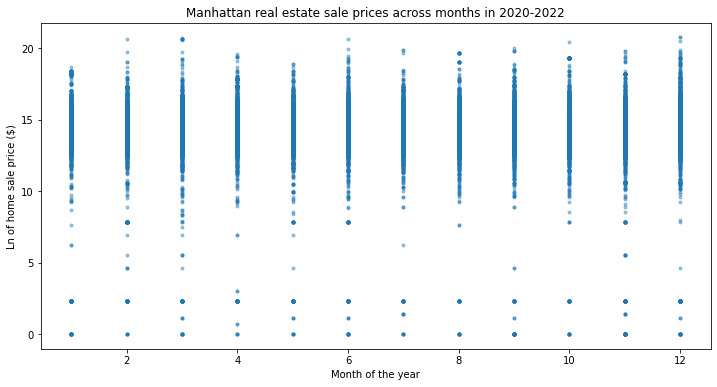

In [10]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.scatter(allsales.month, np.log(allsales.prices), marker='.', alpha=0.4, cmap='coolwarm')
plt.xlabel("Month of the year")
plt.ylabel("Ln of home sale price ($)")
plt.title("Manhattan real estate sale prices across months in 2020-2022")
plt.savefig("months.png")
plt.show()

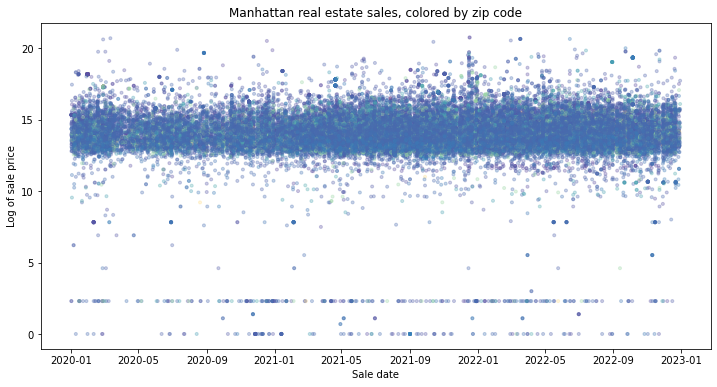

In [12]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.scatter(allsales.realdate, np.log(allsales.prices), c=allsales['ZIP CODE'], marker='.', alpha=0.3, cmap='Spectral_r')
plt.xlabel("Sale date")
plt.ylabel("Log of sale price")
plt.title("Manhattan real estate sales, colored by zip code")
plt.savefig("zipcolors.png")
plt.show()

In [13]:
allsales.prices.describe()

count    5.696000e+04
mean     3.200661e+06
std      1.969748e+07
min      0.000000e+00
25%      4.010000e+05
50%      9.150000e+05
75%      2.100000e+06
max      1.033000e+09
Name: prices, dtype: float64

In [14]:
allsales[['BLOCK', 'LOT', 'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'prices']].describe()

,BLOCK,LOT,ZIP CODE,YEAR BUILT,TAX CLASS AT TIME OF SALE,prices
count,56960.000000,56960.000000,56960.000000,50946.000000,56960.000000,5.696000e+04
mean,1097.123754,753.430337,10030.151106,1955.444176,2.091397,3.200661e+06
std,523.748439,906.249457,37.905708,38.789960,0.483586,1.969748e+07
min,5.000000,1.000000,10001.000000,1111.000000,1.000000,0.000000e+00
25%,740.000000,29.000000,10013.000000,1923.000000,2.000000,4.010000e+05
50%,1158.000000,1003.000000,10022.000000,1957.000000,2.000000,9.150000e+05
75%,1446.000000,1205.000000,10028.000000,1987.000000,2.000000,2.100000e+06
max,2250.000000,9116.000000,10463.000000,2022.000000,4.000000,1.033000e+09


In [15]:
#look at outlier
sub = allsales[allsales['YEAR BUILT'] == 1111]
sub

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,SALE DATE,EASEMENT,City,State,Country,BBL,prices,realdate,month,year
604,1.0,CHELSEA,29 COMMERCIAL GARAGES,4,799.0,70.0,NaN,G7,154 WEST 24TH STREET,NaN,...,11/6/2020,NaN,NaN,NaN,NaN,1 1.0\n2 1.0\n3 1.0\n4 ...,7680000.0,2020-11-06,11,2020


In [16]:
#drop outlier. Commercial garage in Chelsea built in 1111? I think not.
allsales = allsales[allsales['YEAR BUILT'] != 1111]

In [20]:
import math

print(allsales.shape)
allsales = allsales[allsales['prices'] != 0]
allsales = allsales[allsales['prices'] != 1]
allsales = allsales[allsales['prices'] != math.e]
print(allsales.shape)

(56959, 30)
(46720, 30)


In [23]:
#drop obs. where sale price is 0 or 
np.log(allsales['prices']).describe()

count    46720.000000
mean        14.069919
std          1.488357
min          0.693147
25%         13.422468
50%         14.018451
75%         14.739769
max         20.755733
Name: prices, dtype: float64

In [22]:
allsales.prices.describe()

count    4.672000e+04
mean     3.902011e+06
std      2.168627e+07
min      2.000000e+00
25%      6.750000e+05
50%      1.225000e+06
75%      2.520000e+06
max      1.033000e+09
Name: prices, dtype: float64

(array([2.7700e+02, 1.0000e+01, 1.2000e+01, 9.6000e+01, 2.3900e+02,
        1.9300e+03, 3.2468e+04, 1.0507e+04, 1.0500e+03, 1.3100e+02]),
 array([ 0.69314718,  2.69940577,  4.70566435,  6.71192293,  8.71818152,
        10.7244401 , 12.73069869, 14.73695727, 16.74321586, 18.74947444,
        20.75573303]),
 <BarContainer object of 10 artists>)

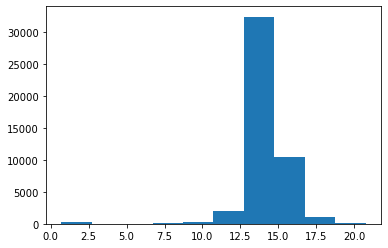

In [21]:
plt.hist(np.log(allsales['prices']))

Text(0, 0.5, 'Ln of sale price')

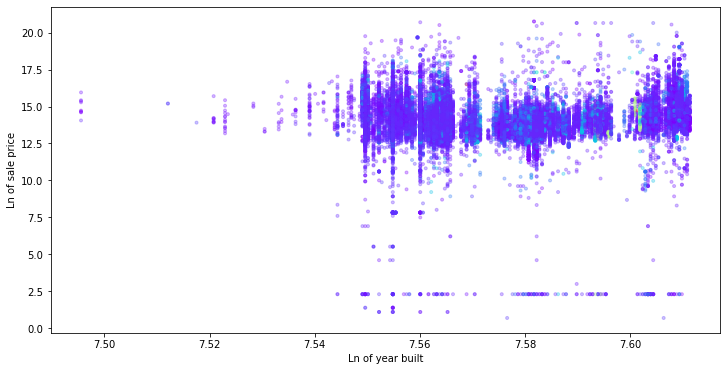

In [24]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.scatter(np.log(allsales['YEAR BUILT']), np.log(allsales['prices']), marker='.', alpha=0.3, c=allsales['ZIP CODE'], cmap='rainbow')
plt.xlabel("Ln of year built")
plt.ylabel("Ln of sale price")

In [25]:
#read in PAD to map to sales
#file = open("Data/bobaadr.txt", "r")
#lines = file.read().split(',')
#print(lines[:20]) #need to remove " and '

file = open("DE.txt", "r")
lines = file.readlines()
dict = {}
for line in lines:
    //Create your own dictionary as you want to be created using the value in each line and store it in dict
df = pd.DataFrame(data=dict)

SyntaxError: invalid syntax (3746003104.py, line 10)

In [26]:
pluto = pd.read_csv("pluto_22v3_1.csv")
pluto = pluto.dropna(how='all')

C:\Users\lproc\AppData\Local\Temp\ipykernel_18192\1548497026.py:1: DtypeWarning: Columns (21,22,24,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto = pd.read_csv("pluto_22v3_1.csv")


In [27]:
pluto.head()

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,BK,1809,16,303.0,3026500.0,3.026500e+10,265.0,2001.0,13.0,36.0,...,NaN,NaN,1,NaN,NaN,22v3.1,NaN,40.687196,-73.946599,NaN
1,BK,6183,33,311.0,3026600.0,3.026600e+10,266.0,3000.0,20.0,47.0,...,NaN,NaN,1,NaN,NaN,22v3.1,NaN,40.614595,-73.992299,NaN
2,BK,6206,22,311.0,3026800.0,3.026800e+10,268.0,3000.0,20.0,47.0,...,NaN,NaN,1,NaN,NaN,22v3.1,NaN,40.612501,-73.991842,NaN
3,BK,1852,37,303.0,3026900.0,3.026900e+10,269.0,1001.0,13.0,36.0,...,NaN,NaN,1,NaN,NaN,22v3.1,NaN,40.681827,-73.941303,NaN
4,BK,5893,8,310.0,3013000.0,3.013000e+10,130.0,2001.0,20.0,43.0,...,NaN,NaN,1,NaN,NaN,22v3.1,NaN,40.632047,-74.021282,NaN


In [29]:
man = pluto[pluto['borough']=='MN']
man.head()

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
10,MN,1917,7502,110.0,1022600.0,1.022600e+10,226.0,1002.0,5.0,9.0,...,1.019170e+09,04/07/2009,1,NaN,NaN,22v3.1,t,40.812789,-73.943106,NaN
51,MN,1888,7504,107.0,1018700.0,1.018700e+10,187.0,2000.0,3.0,6.0,...,1.018880e+09,07/22/2016,1,NaN,NaN,22v3.1,NaN,40.797997,-73.973132,NaN
63,MN,434,7502,103.0,1003200.0,1.003200e+10,32.0,2000.0,1.0,2.0,...,1.004340e+09,12/24/1991,1,NaN,NaN,22v3.1,NaN,40.726073,-73.984147,NaN
72,MN,1253,7502,107.0,1018300.0,1.018300e+10,183.0,3000.0,3.0,6.0,...,1.012530e+09,10/24/1989,1,NaN,NaN,22v3.1,NaN,40.794874,-73.975838,NaN
111,MN,637,7502,102.0,1007500.0,1.007500e+10,75.0,2002.0,2.0,3.0,...,1.006371e+09,08/25/1988,1,NaN,1.0,22v3.1,NaN,40.735162,-74.009284,NaN


In [30]:
man.dtypes

borough       object
block          int64
lot            int64
cd           float64
bct2020      float64
              ...   
version       object
dcpedited     object
latitude     float64
longitude    float64
notes        float64
Length: 92, dtype: object

In [34]:
new = allsales.merge(man, how='left', left_on=['BLOCK', 'LOT'], right_on=['block', 'lot'])
new.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,66.0,NaN,C0,243 EAST 7TH STREET,NaN,...,NaN,NaN,1.0,NaN,1.0,22v3.1,NaN,40.724019,-73.978144,NaN
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,374.0,1.0,NaN,C7,301-303 EAST 4TH STREET,NaN,...,1.003740e+09,02/07/2007,1.0,NaN,NaN,22v3.1,NaN,40.722285,-73.979880,NaN
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,31.0,NaN,C4,"278 EAST 7TH STREET, 1A",NaN,...,NaN,NaN,1.0,NaN,NaN,22v3.1,NaN,40.723091,-73.977077,NaN
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,31.0,NaN,C4,"278 EAST 7TH STREET, 1B/2B",NaN,...,NaN,NaN,1.0,NaN,NaN,22v3.1,NaN,40.723091,-73.977077,NaN
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,31.0,NaN,C4,"278 EAST 7TH STREET, 1C/1D",NaN,...,NaN,NaN,1.0,NaN,NaN,22v3.1,NaN,40.723091,-73.977077,NaN


In [35]:
print(allsales.shape)
print(man.shape)
print(new.shape)

(46720, 30)
(42695, 92)
(46720, 122)


In [38]:
new.latitude.describe()

count    22906.000000
mean        40.766924
std          0.032044
min         40.702776
25%         40.741578
50%         40.767260
75%         40.782029
max         40.878067
Name: latitude, dtype: float64

In [36]:
list(new.columns)

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BLOCK',
 'LOT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'ZIP CODE',
 'RESIDENTIAL\nUNITS',
 'COMMERCIAL\nUNITS',
 'TOTAL \nUNITS',
 'LAND \nSQUARE FEET',
 'GROSS \nSQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'BUILDING CLASS\nAT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE',
 'EASEMENT',
 'City',
 'State',
 'Country',
 'BBL',
 'prices',
 'realdate',
 'month',
 'year',
 'borough',
 'block',
 'lot',
 'cd',
 'bct2020',
 'bctcb2020',
 'ct2010',
 'cb2010',
 'schooldist',
 'council',
 'zipcode',
 'firecomp',
 'policeprct',
 'healthcenterdistrict',
 'healtharea',
 'sanitboro',
 'sanitdistrict',
 'sanitsub',
 'address',
 'zonedist1',
 'zonedist2',
 'zonedist3',
 'zonedist4',
 'overlay1',
 'overlay2',
 'spdist1',
 'spdist2',
 'spdist3',
 'ltdheight',
 'splitzone',
 'bldgclass',
 'landuse',
 'easements',
 'ownertype',
 'ownername',
 'lotarea',
 'bldgarea',
 'comar

In [39]:
new.to_csv('new.csv')